In [110]:
!pip install opencv-python
import numpy as np  # linear algebra
import cv2 # opencv
import matplotlib.pyplot as plt # image plotting
# keras
from keras import Sequential
from keras.layers import Flatten, Dense
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
import os
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action="ignore")
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report
#tensorflow libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D, Dense, Dropout,Flatten, Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import TensorBoard,EarlyStopping 

In [111]:
# Load train data set
with_mask_dir='C:/Users/Shilpi/Desktop/Learning/Pilani-AIML/dataset/train_validate/masked'
without_mask_dir='C:/Users/Shilpi/Desktop/Learning/Pilani-AIML/dataset/train_validate/unmasked'



# Load test data set

with_mask_dir_test='C:/Users/Shilpi/Desktop/Learning/Pilani-AIML/dataset/test/masked'
without_mask_dir_test='C:/Users/Shilpi/Desktop/Learning/Pilani-AIML/dataset/test/unmasked'

# Load Validation data set
with_mask_dir_val='C:/Users/Shilpi/Desktop/Learning/Pilani-AIML/dataset/train_validate/masked'
without_mask_dir_val='C:/Users/Shilpi/Desktop/Learning/Pilani-AIML/dataset/train_validate/unmasked'


In [112]:
filepaths = []
labels= []
dict_list = [with_mask_dir, without_mask_dir]
for i, j in enumerate(dict_list):
    print(i)
    print(j)
    flist=os.listdir(j)
    #print(flist)
    for f in flist:
        fpath=os.path.join(j,f)
        filepaths.append(fpath)
        if i==0:
          labels.append('with_mask')
        else:
          labels.append('without_mask') 

0
C:/Users/Shilpi/Desktop/Learning/Pilani-AIML/dataset/train_validate/masked
1
C:/Users/Shilpi/Desktop/Learning/Pilani-AIML/dataset/train_validate/unmasked


In [113]:
Fseries = pd.Series(filepaths, name="filepaths")
Lseries = pd.Series(labels, name="labels")

In [114]:
mask_data = pd.concat([Fseries,Lseries], axis=1)
mask_df = pd.DataFrame(mask_data)

In [115]:
print(mask_df.head())
print(mask_df["labels"].value_counts())

                                           filepaths     labels
0  C:/Users/Shilpi/Desktop/Learning/Pilani-AIML/d...  with_mask
1  C:/Users/Shilpi/Desktop/Learning/Pilani-AIML/d...  with_mask
2  C:/Users/Shilpi/Desktop/Learning/Pilani-AIML/d...  with_mask
3  C:/Users/Shilpi/Desktop/Learning/Pilani-AIML/d...  with_mask
4  C:/Users/Shilpi/Desktop/Learning/Pilani-AIML/d...  with_mask
with_mask       887
without_mask    840
Name: labels, dtype: int64


In [116]:
#shape of datatset
mask_df.shape

(1727, 2)

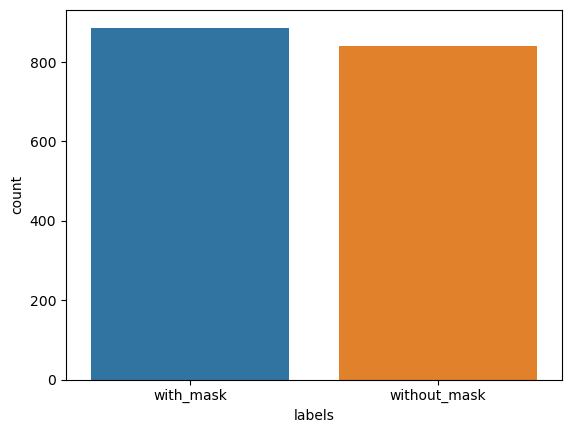

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt
# count plot on single categorical variable
sns.countplot(x ='labels', data = mask_df)
 
# Show the plot
plt.show()

In [118]:
filepaths = []
labels= []
dict_list = [with_mask_dir_test, without_mask_dir_test]
for i, j in enumerate(dict_list):
    print(i)
    print(j)
    flist=os.listdir(j)
    #print(flist)
    for f in flist:
        fpath=os.path.join(j,f)
        filepaths.append(fpath)
        if i==0:
          labels.append('with_mask_dir_test')
        else:
          labels.append('without_mask_dir_test') 

0
C:/Users/Shilpi/Desktop/Learning/Pilani-AIML/dataset/test/masked
1
C:/Users/Shilpi/Desktop/Learning/Pilani-AIML/dataset/test/unmasked


In [119]:
Fseries_test = pd.Series(filepaths, name="filepaths")
Lseries_test = pd.Series(labels, name="labels")

In [120]:
mask_data_test = pd.concat([Fseries_test,Lseries_test], axis=1)
mask_df_test = pd.DataFrame(mask_data_test)

In [121]:
print(mask_df_test.head())
print(mask_df_test["labels"].value_counts())

                                           filepaths              labels
0  C:/Users/Shilpi/Desktop/Learning/Pilani-AIML/d...  with_mask_dir_test
1  C:/Users/Shilpi/Desktop/Learning/Pilani-AIML/d...  with_mask_dir_test
2  C:/Users/Shilpi/Desktop/Learning/Pilani-AIML/d...  with_mask_dir_test
3  C:/Users/Shilpi/Desktop/Learning/Pilani-AIML/d...  with_mask_dir_test
4  C:/Users/Shilpi/Desktop/Learning/Pilani-AIML/d...  with_mask_dir_test
with_mask_dir_test       160
without_mask_dir_test    160
Name: labels, dtype: int64


In [122]:
#shape of datatset
mask_df_test.shape

(320, 2)

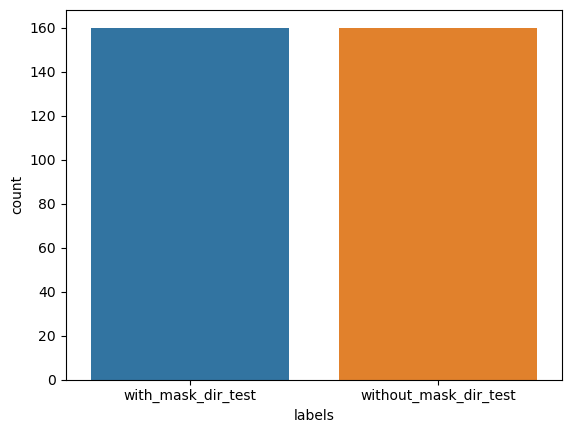

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt
# count plot on single categorical variable
sns.countplot(x ='labels', data = mask_df_test)
 
# Show the plot
plt.show()

In [124]:
test_set = train_test_split(mask_df_test, random_state=42)

In [125]:
#Generate batches of tensor image data with real-time data augmentation.
image_gen = ImageDataGenerator(preprocessing_function= tf.keras.applications.mobilenet_v2.preprocess_input)

train = image_gen.flow_from_dataframe(dataframe= mask_df,x_col="filepaths",y_col="labels",
                                      target_size=(64,64),
                                      
                                      class_mode="categorical", #used for Sequential Model
                                      batch_size=32,
                                      shuffle=False            #do not shuffle data
                                     )

test = image_gen.flow_from_dataframe(dataframe= mask_df_test,x_col="filepaths", y_col="labels",
                                     target_size=(64,64),
                                     
                                     class_mode="categorical",
                                     batch_size=32,
                                     shuffle= False
                                    )
val = image_gen.flow_from_dataframe(dataframe= mask_df,x_col="filepaths", y_col="labels",
                                    target_size=(64,64),
                                    
                                    class_mode="categorical",
                                    batch_size=32,
                                    shuffle=False
                                   )


Found 1727 validated image filenames belonging to 2 classes.
Found 320 validated image filenames belonging to 2 classes.
Found 1727 validated image filenames belonging to 2 classes.


In [126]:
classes=list(train.class_indices.keys())
print (classes)

['with_mask', 'without_mask']


In [127]:
def show_images(image_gen):
    test_dict = test.class_indices
    classes = list(test_dict.keys())
    images, labels=next(image_gen) # get a sample batch from the generator 
    plt.figure(figsize=(20,20))
    length = len(labels)
    if length<25:
        r=length
    else:
        r=25
    for i in range(r):
        plt.subplot(5,5,i+1)
        image=(images[i]+1)/2 #scale images between 0 and 1
        plt.imshow(image)
        index=np.argmax(labels[i])
        class_name=classes[index]
        plt.title(class_name, color="green",fontsize=16)
        plt.axis('off')
    plt.show()

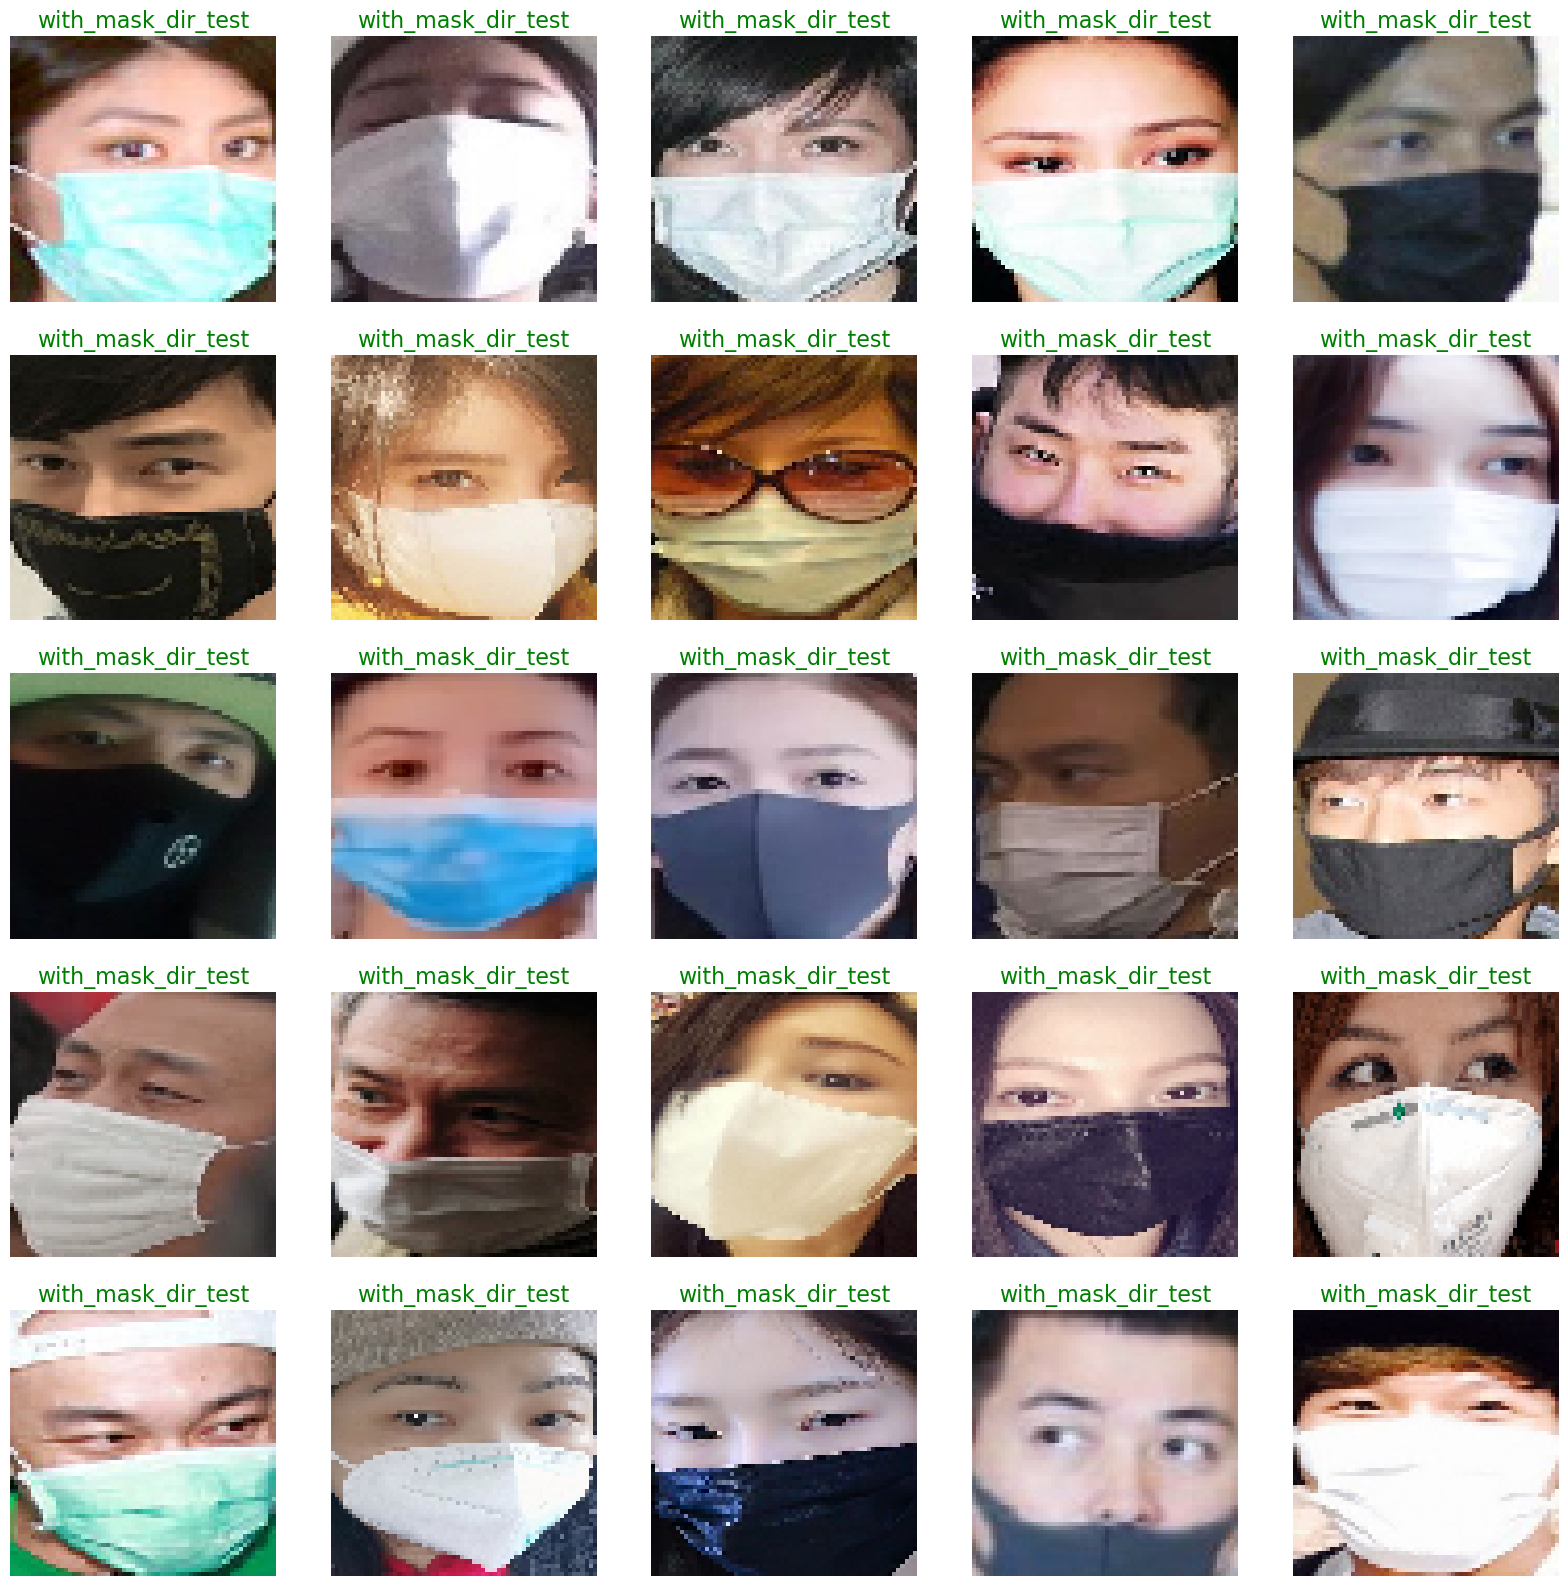

In [128]:
show_images(train)

# 2. Configure the CNN model (use keras tensorflow), an indicative (minimal) configuration is as below. Take activation function (A)=relu. Feel free to use standard values for anything that is not mentioned (eg, take pool size 2x2, filter size 3x3, and so on). [2 points]

In [129]:
import keras
from tensorflow.keras import layers

model_1 = keras.Sequential([
    layers.Conv2D(32, kernel_size=(3,3), activation='relu', padding='same',input_shape=(64,64,3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),
    
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(2, activation='softmax')
])

model_1.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model_1.optimizer.lr=0.001

model_1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 30, 30, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 15, 15, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 13, 13, 32)        18464     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 6, 6, 32)        

In [130]:
history_CNN = model_1.fit(train, validation_data= val, epochs=5,verbose=1)

Epoch 1/5
54/54 [==============================] - 11s 188ms/step - loss: 0.6604 - accuracy: 0.6346 - val_loss: 0.2495 - val_accuracy: 0.9357
Epoch 2/5
54/54 [==============================] - 10s 195ms/step - loss: 0.2336 - accuracy: 0.9236 - val_loss: 0.1411 - val_accuracy: 0.9595
Epoch 3/5
54/54 [==============================] - 10s 186ms/step - loss: 0.2115 - accuracy: 0.9328 - val_loss: 0.1266 - val_accuracy: 0.9531
Epoch 4/5
54/54 [==============================] - 10s 185ms/step - loss: 0.1618 - accuracy: 0.9479 - val_loss: 0.1249 - val_accuracy: 0.9572
Epoch 5/5
54/54 [==============================] - 10s 187ms/step - loss: 0.1608 - accuracy: 0.9514 - val_loss: 0.1096 - val_accuracy: 0.9624


In [131]:
def plot_loss_and_accuracy(history):
    history_df = pd.DataFrame(history)
    history_df.loc[0:, ['loss', 'val_loss']].plot()
    history_df.loc[0:, ['accuracy', 'val_accuracy']].plot()

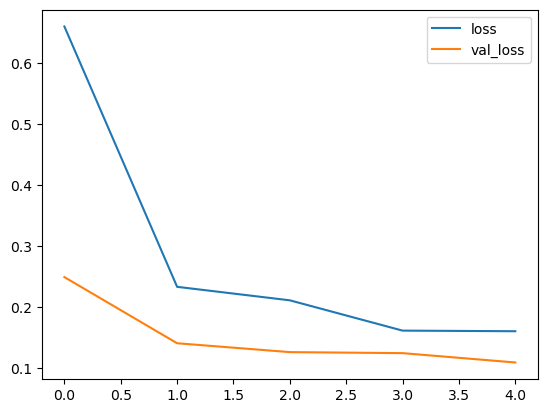

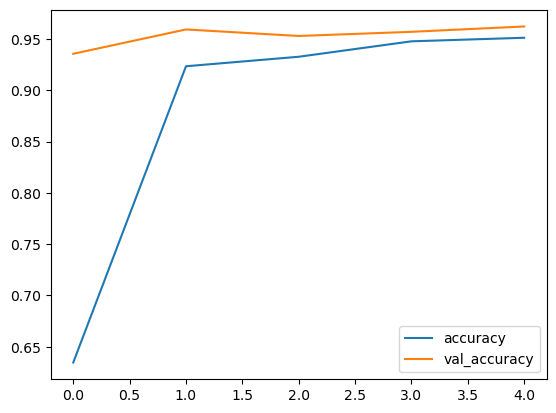

In [132]:
#resuts from model 1
plot_loss_and_accuracy(history_CNN.history)

# 4. Evaluate the trained CNN model on test data. Print classification results. [2 point]

In [134]:
pred = model_1.predict(test)
pred = np.argmax(pred, axis=1) #pick class with highest  probability

labels = (train.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred2 = [labels[k] for k in pred]

y_test = test_set.labels # set y_test to the expected output
print(classification_report(test, pred2))

10/10 [==============================] - 1s 55ms/step


ValueError: Found input variables with inconsistent numbers of samples: [10, 320]

In [ ]:
# model 1
from sklearn.metrics import confusion_matrix, accuracy_score
plt.figure(figsize = (10,5))
cm = confusion_matrix(y_test, pred2)
sns.heatmap(cm, annot=True, fmt = 'g')

# 5. Can you try to make changes in anyway in the CNN model and improve your test accuracy? Let's call the model constructed as per step-2 above as 'default' and the improvement as 'improved' model. Plot precision and recall for default and improved model in a single bar plot. [3 points]
# Create a CNN Model With L1 nd L2 Regularization

In [ ]:
# Create a Sequential model object
cnnModelwithRegularization = models.Sequential()

# Add layers Conv2D for CNN and sepcify MaxPooling

# Layer 1 = input layer
cnnModelwithRegularization.add(layers.Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1) ))

cnnModelwithRegularization.add(layers.MaxPooling2D((2,2)))


# Layer 2
cnnModelwithRegularization.add(layers.Conv2D(64, (3,3), activation="relu"))

cnnModelwithRegularization.add(layers.MaxPooling2D((2,2)))


# layer 2 with L1-L2 with Regularizers
cnnModelwithRegularization.add(layers.Dense(30, activation='relu', 
                          kernel_regularizer = regularizers.l1_l2(l1=0.01, l2=0.01),
                          activity_regularizer = regularizers.l1_l2(l1=0.01, l2=0.01) ) )


# Layer 3
cnnModelwithRegularization.add(layers.Conv2D(64, (3,3), activation="relu" ))
cnnModelwithRegularization.add(layers.Flatten())


# Add Dense layers or fully connected layers
# Layer 4
cnnModelwithRegularization.add(layers.Dense(64, activation="relu" ))

# Layer 5
cnnModelwithRegularization.add(layers.Dense(32, activation="relu" ))

# Layer 6
cnnModelwithRegularization.add(layers.Dense(10, activation="softmax" ))

cnnModelwithRegularization.summary()


In [ ]:
# Configure  the model for training, by using appropriate optimizers and regularizations
# Available optimizer: adam, rmsprop, adagrad, sgd
# loss:  objective that the model will try to minimize. 
# Available loss: categorical_crossentropy, binary_crossentropy, mean_squared_error
# metrics: List of metrics to be evaluated by the model during training and testing. 

cnnModelwithRegularization.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])


In [ ]:
# train the model

history_CNNwithRegularization = cnnModelwithRegularization.fit(train, validation_data= val, epochs=5,verbose=1)

In [ ]:
def plot_loss_and_accuracy(history):
    history_df = pd.DataFrame(history)
    history_df.loc[0:, ['loss', 'val_loss']].plot()
    history_df.loc[0:, ['accuracy', 'val_accuracy']].plot()

In [ ]:
#resuts from model 1
plot_loss_and_accuracy(history_CNNwithRegularization.history)

In [ ]:
pred = cnnModelwithRegularization.predict(test)
pred = np.argmax(pred, axis=1) #pick class with highest  probability

labels = (train.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred2 = [labels[k] for k in pred]

y_test = test_set.labels # set y_test to the expected output
print(classification_report(y_test, pred2))

In [ ]:
# model 1
from sklearn.metrics import confusion_matrix, accuracy_score
plt.figure(figsize = (10,5))
cm = confusion_matrix(y_test, pred2)
sns.heatmap(cm, annot=True, fmt = 'g')